In [9]:
paralaf=dict()
paralaf['sin'] = (45, 0.005, 401, 1000)
paralaf['tru'] = (45, 0.005, 401, 1000)
paralaf['zoi'] = (45, 0.005, 401, 1000)
paralaf['mnist'] = (10, 0.2, 21, 1000)
paralaf['cifar10'] = (20, 0.2, 21, 3000)
paralaf['adult'] = (15, 0.2, 21, 3000)
paralaf['protein'] = (30, 0.2, 21, 3000)
paralaf['ct'] = (30, 0.2, 21, 3000)
paralaf['workloads'] = (30, 0.2, 21, 3000)
paralaf['msd'] = (10, 0.2, 21, 3000)

N_list=[9,17,33,65,129]
h_list=[0.5,0.25,0.125,0.0625,0.03125]

modelseed_list = [402025, 102025, 202025, 302025, 3070, 4080, 5090, 20250101, 72, 46852]
task_name_list = ['sin', 'tru', 'zoi', 'mnist', 'cifar10', 'adult', 'protein', 'ct', 'workloads', 'msd']
modelname_list = ['LAF', 'relu', 'cos', 'tanh', 'sigmoid', 'PL', 'BS']

total_train_loss_values=dict()
total_test_loss_values=dict()
train_loss_values=dict()
test_loss_values=dict()
total_train_time_values=dict()
total_test_time_values=dict()
train_time_values=dict()
test_time_values=dict()
total_train_acc_values=dict()
total_test_acc_values=dict()
train_acc_values=dict()
test_acc_values=dict()

## Load statistics

In [10]:
import numpy as np
import matplotlib.pyplot as plt

for modelname in ['LAF', 'PL', 'BS']:
    for i, task_name in enumerate(task_name_list):
        if task_name in ['sin', 'tru', 'zoi']:
            continue
        L,R,lambda1,lambda2=-2,2,1,0.1
        epochs,_,_,M=paralaf[task_name]
        
        for h, N in zip(h_list,N_list):
            tmp_train_loss_values, tmp_test_loss_values = [], []
            tmp_train_time_values, tmp_test_time_values = [], []
            tmp_train_acc_values, tmp_test_acc_values = [], []
            if modelname=='LAF':
                for modelseed in modelseed_list:
                    read_train_loss_values = np.loadtxt(f"./losses/{task_name}_{modelname}_train_loss_seed={modelseed}_epoch={epochs}_h={h}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                    read_test_loss_values = np.loadtxt(f"./losses/{task_name}_{modelname}_test_loss_seed={modelseed}_epoch={epochs}_h={h}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                    read_train_time_values = np.loadtxt(f"./times/{task_name}_{modelname}_train_time_seed={modelseed}_epoch={epochs}_h={h}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                    read_test_time_values = np.loadtxt(f"./times/{task_name}_{modelname}_test_time_seed={modelseed}_epoch={epochs}_h={h}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                    if task_name in ['mnist', 'cifar10', 'adult']:
                        read_train_acc_values = np.loadtxt(f"./accuracies/{task_name}_{modelname}_train_acc_seed={modelseed}_epoch={epochs}_h={h}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                        read_test_acc_values = np.loadtxt(f"./accuracies/{task_name}_{modelname}_test_acc_seed={modelseed}_epoch={epochs}_h={h}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
            elif modelname=='BS':
                for modelseed in modelseed_list:
                    read_train_loss_values = np.loadtxt(f"./losses/{task_name}_{modelname}_train_loss_seed={modelseed}_epoch={epochs}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                    read_test_loss_values = np.loadtxt(f"./losses/{task_name}_{modelname}_test_loss_seed={modelseed}_epoch={epochs}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                    read_train_time_values = np.loadtxt(f"./times/{task_name}_{modelname}_train_time_seed={modelseed}_epoch={epochs}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                    read_test_time_values = np.loadtxt(f"./times/{task_name}_{modelname}_test_time_seed={modelseed}_epoch={epochs}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                    if task_name in ['mnist', 'cifar10', 'adult']:
                        read_train_acc_values = np.loadtxt(f"./accuracies/{task_name}_{modelname}_train_acc_seed={modelseed}_epoch={epochs}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                        read_test_acc_values = np.loadtxt(f"./accuracies/{task_name}_{modelname}_test_acc_seed={modelseed}_epoch={epochs}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
            elif modelname=='PL':
                for modelseed in modelseed_list:
                    read_train_loss_values = np.loadtxt(f"./losses/{task_name}_{modelname}_train_loss_seed={modelseed}_epoch={epochs}_N={N}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                    read_test_loss_values = np.loadtxt(f"./losses/{task_name}_{modelname}_test_loss_seed={modelseed}_epoch={epochs}_N={N}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                    read_train_time_values = np.loadtxt(f"./times/{task_name}_{modelname}_train_time_seed={modelseed}_epoch={epochs}_N={N}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                    read_test_time_values = np.loadtxt(f"./times/{task_name}_{modelname}_test_time_seed={modelseed}_epoch={epochs}_N={N}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                    if task_name in ['mnist', 'cifar10', 'adult']:
                        read_train_acc_values = np.loadtxt(f"./accuracies/{task_name}_{modelname}_train_acc_seed={modelseed}_epoch={epochs}_N={N}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                        read_test_acc_values = np.loadtxt(f"./accuracies/{task_name}_{modelname}_test_acc_seed={modelseed}_epoch={epochs}_N={N}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")

            tmp_train_loss_values.append(read_train_loss_values.copy())
            tmp_test_loss_values.append(read_test_loss_values.copy())
            tmp_train_time_values.append(read_train_time_values.copy())
            tmp_test_time_values.append(read_test_time_values.copy())
            if task_name in ['mnist', 'cifar10', 'adult']:
                tmp_train_acc_values.append(read_train_acc_values.copy())
                tmp_test_acc_values.append(read_test_acc_values.copy())
            
            total_name = task_name+'_'+modelname+f'{N}'
            
            total_train_loss_values[total_name] = np.array(tmp_train_loss_values)
            total_test_loss_values[total_name] = np.array(tmp_test_loss_values)
            train_loss_values[total_name] = total_train_loss_values[total_name].mean(axis=0)
            test_loss_values[total_name] = total_test_loss_values[total_name].mean(axis=0)
            
            total_train_time_values[total_name] = np.array(tmp_train_time_values)
            total_test_time_values[total_name] = np.array(tmp_test_time_values)
            train_time_values[total_name] = total_train_time_values[total_name].mean(axis=0)
            test_time_values[total_name] = total_test_time_values[total_name].mean(axis=0)
            
            if task_name in ['mnist', 'cifar10', 'adult']:
                total_train_acc_values[total_name] = np.array(tmp_train_acc_values)
                total_test_acc_values[total_name] = np.array(tmp_test_acc_values)
                train_acc_values[total_name] = total_train_acc_values[total_name].mean(axis=0)
                test_acc_values[total_name] = total_test_acc_values[total_name].mean(axis=0)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

for i, task_name in enumerate(task_name_list):
    L,R,lambda1,lambda2=-2,2,1,0.1
    epochs,h,N,M=paralaf[task_name]
    
    for modelname in modelname_list:
        tmp_train_loss_values, tmp_test_loss_values = [], []
        tmp_train_time_values, tmp_test_time_values = [], []
        tmp_train_acc_values, tmp_test_acc_values = [], []
        if modelname=='LAF':
            for modelseed in modelseed_list:
                read_train_loss_values = np.loadtxt(f"./losses/{task_name}_{modelname}_train_loss_seed={modelseed}_epoch={epochs}_h={h}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                read_test_loss_values = np.loadtxt(f"./losses/{task_name}_{modelname}_test_loss_seed={modelseed}_epoch={epochs}_h={h}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                read_train_time_values = np.loadtxt(f"./times/{task_name}_{modelname}_train_time_seed={modelseed}_epoch={epochs}_h={h}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                read_test_time_values = np.loadtxt(f"./times/{task_name}_{modelname}_test_time_seed={modelseed}_epoch={epochs}_h={h}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                if task_name in ['mnist', 'cifar10', 'adult']:
                    read_train_acc_values = np.loadtxt(f"./accuracies/{task_name}_{modelname}_train_acc_seed={modelseed}_epoch={epochs}_h={h}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                    read_test_acc_values = np.loadtxt(f"./accuracies/{task_name}_{modelname}_test_acc_seed={modelseed}_epoch={epochs}_h={h}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
        elif modelname=='BS':
            for modelseed in modelseed_list:
                read_train_loss_values = np.loadtxt(f"./losses/{task_name}_{modelname}_train_loss_seed={modelseed}_epoch={epochs}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                read_test_loss_values = np.loadtxt(f"./losses/{task_name}_{modelname}_test_loss_seed={modelseed}_epoch={epochs}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                read_train_time_values = np.loadtxt(f"./times/{task_name}_{modelname}_train_time_seed={modelseed}_epoch={epochs}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                read_test_time_values = np.loadtxt(f"./times/{task_name}_{modelname}_test_time_seed={modelseed}_epoch={epochs}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                if task_name in ['mnist', 'cifar10', 'adult']:
                    read_train_acc_values = np.loadtxt(f"./accuracies/{task_name}_{modelname}_train_acc_seed={modelseed}_epoch={epochs}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                    read_test_acc_values = np.loadtxt(f"./accuracies/{task_name}_{modelname}_test_acc_seed={modelseed}_epoch={epochs}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
        elif modelname=='PL':
            for modelseed in modelseed_list:
                read_train_loss_values = np.loadtxt(f"./losses/{task_name}_{modelname}_train_loss_seed={modelseed}_epoch={epochs}_N={N}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                read_test_loss_values = np.loadtxt(f"./losses/{task_name}_{modelname}_test_loss_seed={modelseed}_epoch={epochs}_N={N}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                read_train_time_values = np.loadtxt(f"./times/{task_name}_{modelname}_train_time_seed={modelseed}_epoch={epochs}_N={N}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                read_test_time_values = np.loadtxt(f"./times/{task_name}_{modelname}_test_time_seed={modelseed}_epoch={epochs}_N={N}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                if task_name in ['mnist', 'cifar10', 'adult']:
                    read_train_acc_values = np.loadtxt(f"./accuracies/{task_name}_{modelname}_train_acc_seed={modelseed}_epoch={epochs}_N={N}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
                    read_test_acc_values = np.loadtxt(f"./accuracies/{task_name}_{modelname}_test_acc_seed={modelseed}_epoch={epochs}_N={N}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt")
        else:
            for modelseed in modelseed_list:
                read_train_loss_values = np.loadtxt(f"./losses/{task_name}_{modelname}_train_loss_seed={modelseed}_epoch={epochs}_M={M}.txt")
                read_test_loss_values = np.loadtxt(f"./losses/{task_name}_{modelname}_test_loss_seed={modelseed}_epoch={epochs}_M={M}.txt")
                read_train_time_values = np.loadtxt(f"./times/{task_name}_{modelname}_train_time_seed={modelseed}_epoch={epochs}_M={M}.txt")
                read_test_time_values = np.loadtxt(f"./times/{task_name}_{modelname}_test_time_seed={modelseed}_epoch={epochs}_M={M}.txt")
                if task_name in ['mnist', 'cifar10', 'adult']:
                    read_train_acc_values = np.loadtxt(f"./accuracies/{task_name}_{modelname}_train_acc_seed={modelseed}_epoch={epochs}_M={M}.txt")
                    read_test_acc_values = np.loadtxt(f"./accuracies/{task_name}_{modelname}_test_acc_seed={modelseed}_epoch={epochs}_M={M}.txt")
                
        tmp_train_loss_values.append(read_train_loss_values.copy())
        tmp_test_loss_values.append(read_test_loss_values.copy())
        tmp_train_time_values.append(read_train_time_values.copy())
        tmp_test_time_values.append(read_test_time_values.copy())
        if task_name in ['mnist', 'cifar10', 'adult']:
            tmp_train_acc_values.append(read_train_acc_values.copy())
            tmp_test_acc_values.append(read_test_acc_values.copy())
        
        total_name = task_name+'_'+modelname
        
        total_train_loss_values[total_name] = np.array(tmp_train_loss_values)
        total_test_loss_values[total_name] = np.array(tmp_test_loss_values)
        train_loss_values[total_name] = total_train_loss_values[total_name].mean(axis=0)
        test_loss_values[total_name] = total_test_loss_values[total_name].mean(axis=0)
        
        total_train_time_values[total_name] = np.array(tmp_train_time_values)
        total_test_time_values[total_name] = np.array(tmp_test_time_values)
        train_time_values[total_name] = total_train_time_values[total_name].mean(axis=0)
        test_time_values[total_name] = total_test_time_values[total_name].mean(axis=0)
        
        if task_name in ['mnist', 'cifar10', 'adult']:
            total_train_acc_values[total_name] = np.array(tmp_train_acc_values)
            total_test_acc_values[total_name] = np.array(tmp_test_acc_values)
            train_acc_values[total_name] = total_train_acc_values[total_name].mean(axis=0)
            test_acc_values[total_name] = total_test_acc_values[total_name].mean(axis=0)
            

In [12]:
train_acc_values.keys()

dict_keys(['mnist_LAF9', 'mnist_LAF17', 'mnist_LAF33', 'mnist_LAF65', 'mnist_LAF129', 'cifar10_LAF9', 'cifar10_LAF17', 'cifar10_LAF33', 'cifar10_LAF65', 'cifar10_LAF129', 'adult_LAF9', 'adult_LAF17', 'adult_LAF33', 'adult_LAF65', 'adult_LAF129', 'mnist_PL9', 'mnist_PL17', 'mnist_PL33', 'mnist_PL65', 'mnist_PL129', 'cifar10_PL9', 'cifar10_PL17', 'cifar10_PL33', 'cifar10_PL65', 'cifar10_PL129', 'adult_PL9', 'adult_PL17', 'adult_PL33', 'adult_PL65', 'adult_PL129', 'mnist_BS9', 'mnist_BS17', 'mnist_BS33', 'mnist_BS65', 'mnist_BS129', 'cifar10_BS9', 'cifar10_BS17', 'cifar10_BS33', 'cifar10_BS65', 'cifar10_BS129', 'adult_BS9', 'adult_BS17', 'adult_BS33', 'adult_BS65', 'adult_BS129', 'mnist_LAF', 'mnist_relu', 'mnist_cos', 'mnist_tanh', 'mnist_sigmoid', 'mnist_PL', 'mnist_BS', 'cifar10_LAF', 'cifar10_relu', 'cifar10_cos', 'cifar10_tanh', 'cifar10_sigmoid', 'cifar10_PL', 'cifar10_BS', 'adult_LAF', 'adult_relu', 'adult_cos', 'adult_tanh', 'adult_sigmoid', 'adult_PL', 'adult_BS'])

In [13]:
for task_name in task_name_list[3:]:
    for modelname in ['LAF', 'PL']:
        print(f'{task_name}_{modelname}\t', end='')
        for N in N_list:
            total_name = task_name+'_'+modelname+f'{N}'
            print(f'{test_loss_values[total_name].mean():.4f}', end='\t')
        print()
    print()


mnist_LAF	0.2325	0.1488	0.1589	0.1645	0.1634	
mnist_PL	0.1910	0.1798	0.1842	110.8123	4919243033.3974	

cifar10_LAF	1.4968	1.5068	1.5282	1.5268	1.5291	
cifar10_PL	1.5104	1.5198	22.5694	2609865425.3843	133362268112949545214672896.0000	

adult_LAF	0.3129	0.3192	0.3305	0.3489	0.3411	
adult_PL	0.3796	1097.5348	409268618430.9932	nan	nan	

protein_LAF	0.2499	0.2216	0.2013	0.1875	0.1972	
protein_PL	1288036.8227	41181686381180113387520.0000	nan	nan	nan	

ct_LAF	0.2717	0.2713	0.2524	0.2571	0.2431	
ct_PL	366586138273.2041	2309098426736361698839930930724864.0000	nan	nan	nan	

workloads_LAF	1.0966	0.6943	0.4404	0.3807	0.3717	
workloads_PL	1.5037	8512160.9619	200623661393344789718767763456.0000	nan	nan	

msd_LAF	0.1193	0.1135	0.1469	0.1449	0.1224	
msd_PL	39248970845.5002	nan	nan	nan	nan	



## Plot loss curves for RFLAF(N=20) and RF_relu

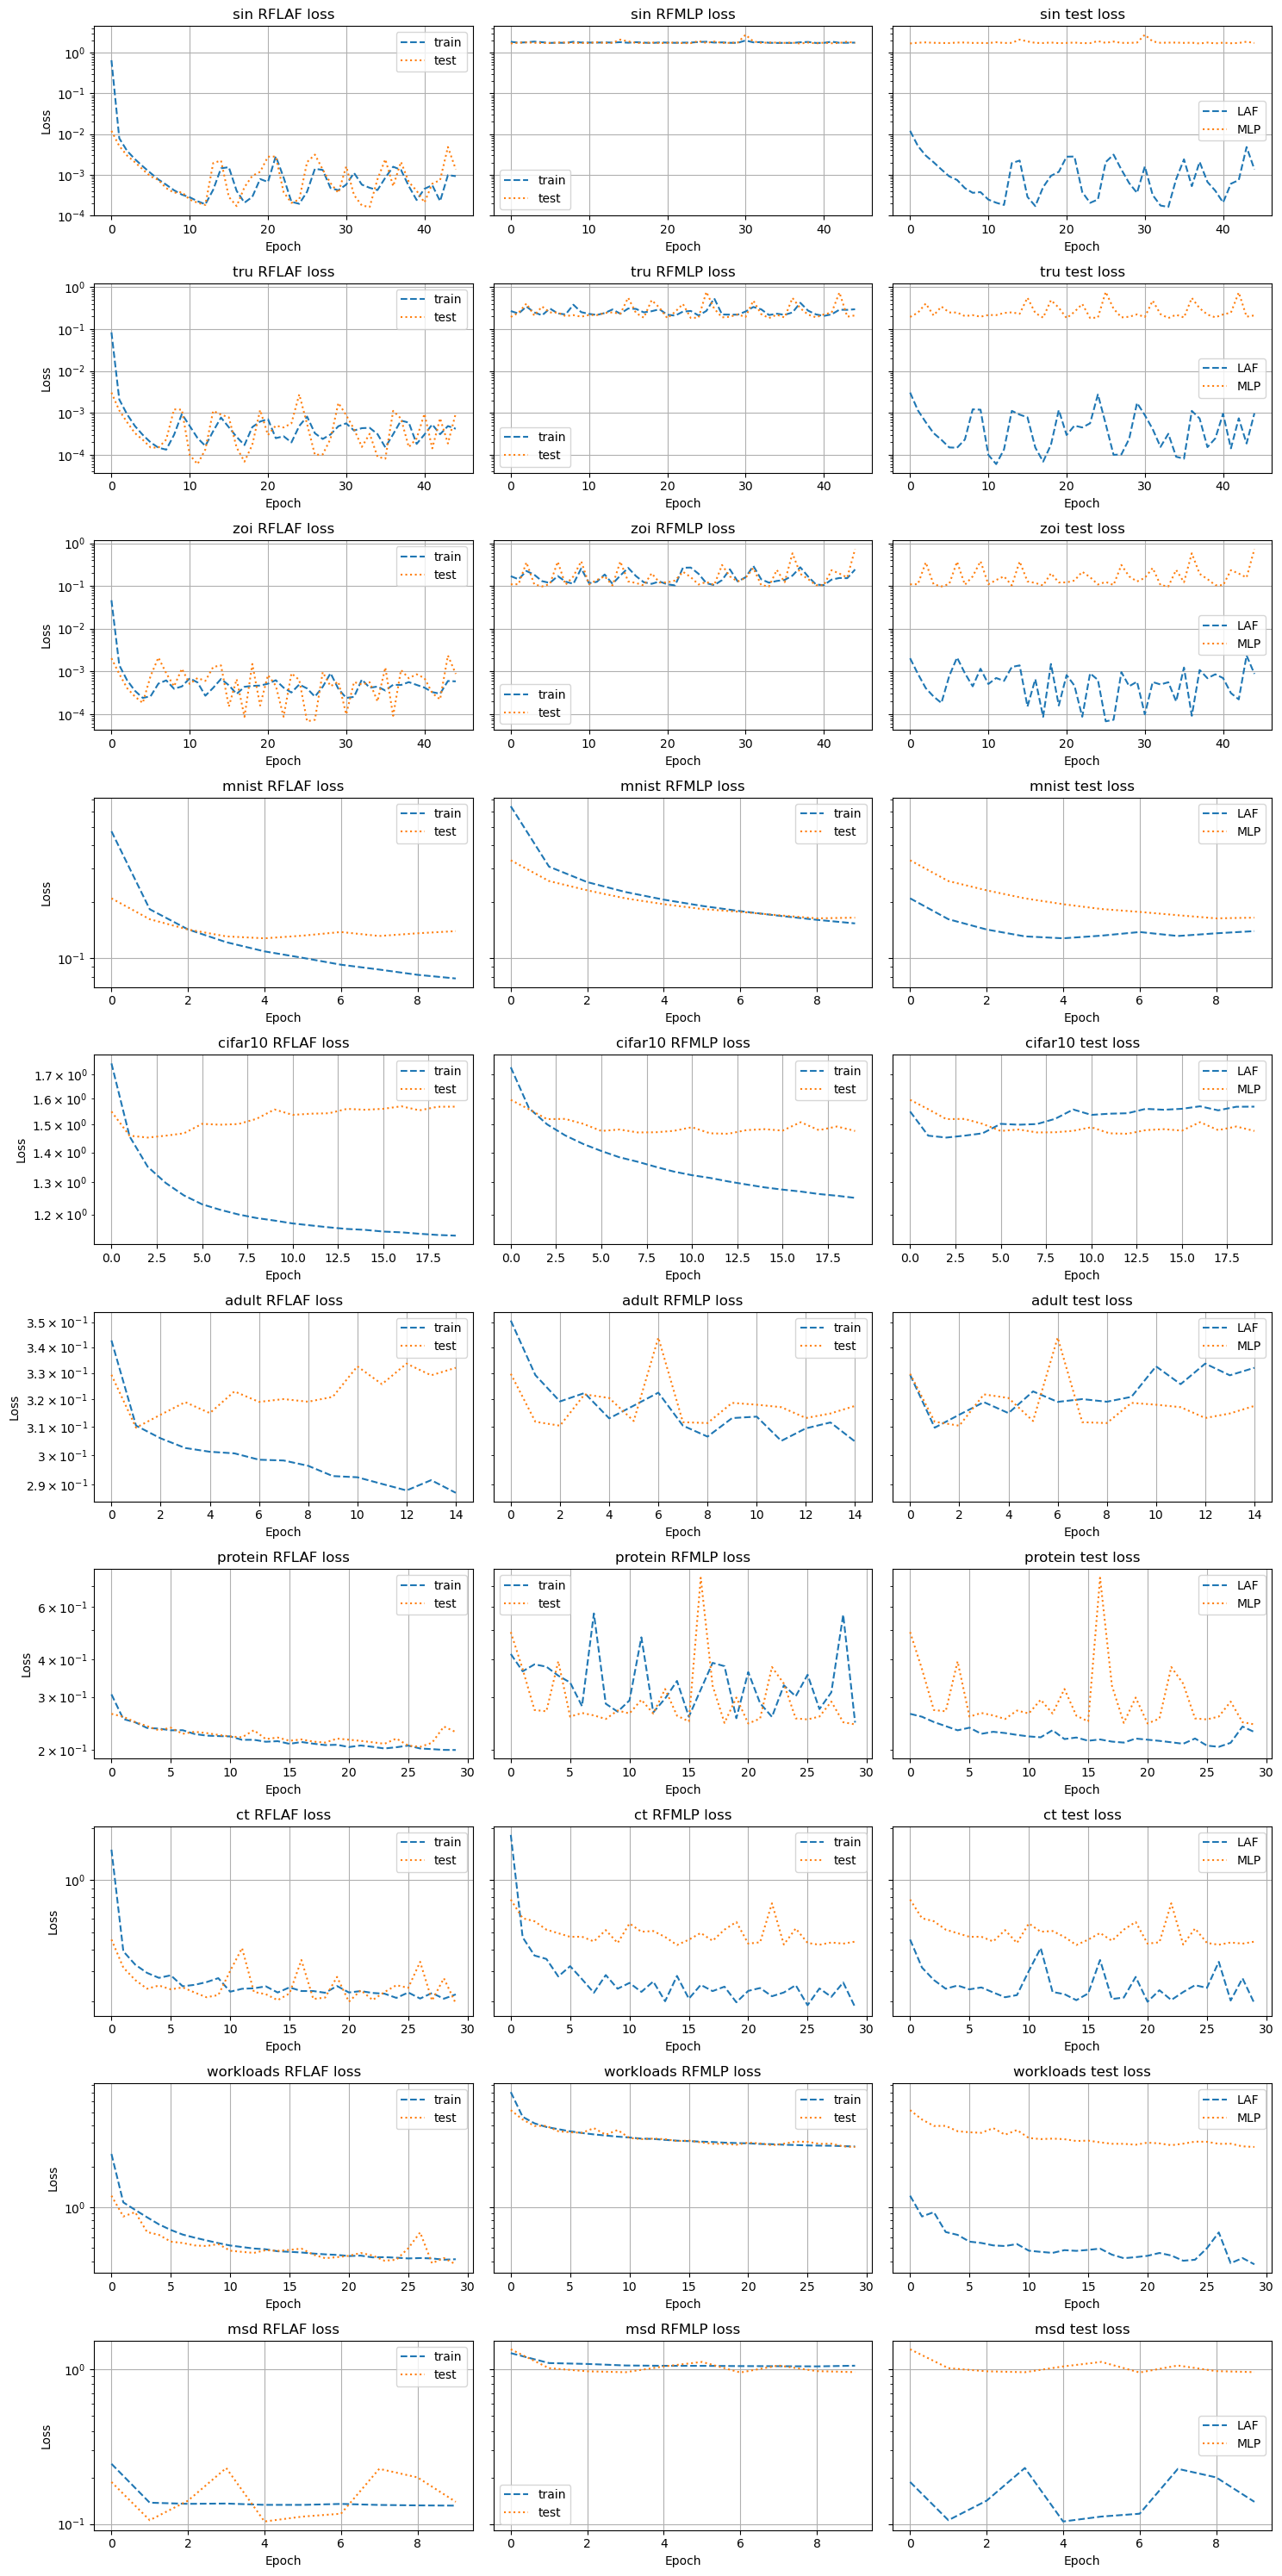

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Plot loss curves
task_name = 'mnist'

targ='LAF'
comp='relu'

semilog = True

fig, axs = plt.subplots(len(task_name_list), 3, figsize=(15, 3*len(task_name_list)), sharey='row')

for i, task_name in enumerate(task_name_list[:]):
    L,R,lambda1,lambda2=-2,2,1,0.1
    epochs,h,N,M=paralaf[task_name]

    if semilog:
        axs[i,0].semilogy(train_loss_values[task_name+'_'+targ], label='train', ls='--')
        axs[i,0].semilogy(test_loss_values[task_name+'_'+targ], label='test', ls=':')
    else:
        axs[i,0].plot(train_loss_values[task_name+'_'+targ], label='train', ls='--')
        axs[i,0].plot(test_loss_values[task_name+'_'+targ], label='test', ls=':')
    axs[i,0].legend()
    axs[i,0].set_title(f'{task_name} RFLAF loss')
    axs[i,0].grid(True)
    axs[i,0].set_xlabel('Epoch')
    axs[i,0].set_ylabel('Loss')

    if semilog:
        axs[i,1].semilogy(train_loss_values[task_name+'_'+comp], label='train', ls='--')
        axs[i,1].semilogy(test_loss_values[task_name+'_'+comp], label='test', ls=':')
    else:
        axs[i,1].plot(train_loss_values[task_name+'_'+comp], label='train', ls='--')
        axs[i,1].plot(test_loss_values[task_name+'_'+comp], label='test', ls=':')
    axs[i,1].legend()
    axs[i,1].set_title(f'{task_name} RFMLP loss')
    axs[i,1].grid(True)
    axs[i,1].set_xlabel('Epoch')

    if semilog:
        axs[i,2].semilogy(test_loss_values[task_name+'_'+targ], label='LAF', ls='--')
        axs[i,2].semilogy(test_loss_values[task_name+'_'+comp], label='MLP', ls=':')
    else:
        axs[i,2].plot(test_loss_values[task_name+'_'+targ], label='LAF', ls='--')
        axs[i,2].plot(test_loss_values[task_name+'_'+comp], label='MLP', ls=':')
    axs[i,2].legend()
    axs[i,2].set_title(f"{task_name} test loss")
    axs[i,2].grid(True)
    axs[i,2].set_xlabel('Epoch')

# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title(f'{task_name} {modelname} loss')
# # if losstype=='train':
# #     plt.title('Train Losses Curves')
# # else:
# #     plt.title('Test Losses Curves')
# plt.legend(loc='upper right')
# plt.grid(True)
plt.tight_layout()

## Aggregating data

In [14]:
import pandas as pd

In [15]:
info = pd.DataFrame(
    index=task_name_list,
    columns=['cv_laf', 'cv_relu', 'cv_cos', 'cv_tanh', 'cv_sig', 'cv_bs', 'cv_pl',
             'num_epoch', 
             'laf_loss', 'relu_loss', 'cos_loss', 'tanh_loss', 'sig_loss', 'bs_loss', 'pl_loss',
             'laf_acc(%)', 'relu_acc(%)', 'cos_acc(%)', 'tanh_acc(%)', 'sig_acc(%)', 'bs_acc(%)', 'pl_acc(%)',
             'train_laf', 'train_relu', 'N', 'train_inc(%)', 'train_ratio', 'train_bs', 'train_pl',
             'train_ratio_bs', 'train_ratio_pl', 'test_ratio_bs', 'test_ratio_pl',
             'test_laf', 'test_relu', 'test_inc(%)', 'test_ratio', 'test_bs', 'test_pl',
             'laf8_loss', 'laf16_loss', 'laf32_loss', 'laf64_loss', 'laf128_loss',
             'laf8_acc', 'laf16_acc', 'laf32_acc', 'laf64_acc', 'laf128_acc',
             'laf8_train', 'laf16_train', 'laf32_train', 'laf64_train', 'laf128_train',
             'laf8_test', 'laf16_test', 'laf32_test', 'laf64_test', 'laf128_test',
             'laf8_cv', 'laf16_cv', 'laf32_cv', 'laf64_cv', 'laf128_cv',
             'laf8_cvtime', 'laf16_cvtime', 'laf32_cvtime', 'laf64_cvtime', 'laf128_cvtime',
             'bs8_loss', 'bs16_loss', 'bs32_loss', 'bs64_loss', 'bs128_loss',
             'bs8_acc', 'bs16_acc', 'bs32_acc', 'bs64_acc', 'bs128_acc',
             'bs8_train', 'bs16_train', 'bs32_train', 'bs64_train', 'bs128_train',
             'bs8_test', 'bs16_test', 'bs32_test', 'bs64_test', 'bs128_test',
             'bs8_cv', 'bs16_cv', 'bs32_cv', 'bs64_cv', 'bs128_cv',
             'bs8_cvtime', 'bs16_cvtime', 'bs32_cvtime', 'bs64_cvtime', 'bs128_cvtime',
             'pl8_loss', 'pl16_loss', 'pl32_loss', 'pl64_loss', 'pl128_loss',
             'pl8_acc', 'pl16_acc', 'pl32_acc', 'pl64_acc', 'pl128_acc',
             'pl8_train', 'pl16_train', 'pl32_train', 'pl64_train', 'pl128_train',
             'pl8_test', 'pl16_test', 'pl32_test', 'pl64_test', 'pl128_test',
             'pl8_cv', 'pl16_cv', 'pl32_cv', 'pl64_cv', 'pl128_cv',
             'pl8_cvtime', 'pl16_cvtime', 'pl32_cvtime', 'pl64_cvtime', 'pl128_cvtime'
            ]
)

In [16]:
for i, task_name in enumerate(task_name_list):
    info.loc[task_name, 'cv_laf']=np.argmin(test_loss_values[task_name+'_LAF'])+1
    info.loc[task_name, 'cv_bs']=np.argmin(test_loss_values[task_name+'_BS'])+1
    info.loc[task_name, 'cv_pl']=np.argmin(test_loss_values[task_name+'_PL'])+1
    info.loc[task_name, 'cv_relu']=np.argmin(test_loss_values[task_name+'_relu'])+1
    info.loc[task_name, 'cv_cos']=np.argmin(test_loss_values[task_name+'_cos'])+1
    info.loc[task_name, 'cv_tanh']=np.argmin(test_loss_values[task_name+'_tanh'])+1
    info.loc[task_name, 'cv_sig']=np.argmin(test_loss_values[task_name+'_sigmoid'])+1
    
    info.loc[task_name, 'num_epoch']=paralaf[task_name][0]
    info.loc[task_name, 'N']=paralaf[task_name][2]
    
    info.loc[task_name, 'laf_loss']=np.min(test_loss_values[task_name+'_LAF'])
    info.loc[task_name, 'bs_loss']=np.min(test_loss_values[task_name+'_BS'])
    info.loc[task_name, 'pl_loss']=np.min(test_loss_values[task_name+'_PL'])
    info.loc[task_name, 'relu_loss']=np.min(test_loss_values[task_name+'_relu'])
    info.loc[task_name, 'cos_loss']=np.min(test_loss_values[task_name+'_cos'])
    info.loc[task_name, 'tanh_loss']=np.min(test_loss_values[task_name+'_tanh'])
    info.loc[task_name, 'sig_loss']=np.min(test_loss_values[task_name+'_sigmoid'])
    if task_name in ['mnist', 'cifar10', 'adult']:
        info.loc[task_name, 'laf_acc(%)']=np.max(test_acc_values[task_name+'_LAF'])*100
        info.loc[task_name, 'bs_acc(%)']=np.max(test_acc_values[task_name+'_BS'])*100
        info.loc[task_name, 'pl_acc(%)']=np.max(test_acc_values[task_name+'_PL'])*100
        info.loc[task_name, 'relu_acc(%)']=np.max(test_acc_values[task_name+'_relu'])*100
        info.loc[task_name, 'cos_acc(%)']=np.max(test_acc_values[task_name+'_cos'])*100
        info.loc[task_name, 'tanh_acc(%)']=np.max(test_acc_values[task_name+'_tanh'])*100
        info.loc[task_name, 'sig_acc(%)']=np.max(test_acc_values[task_name+'_sigmoid'])*100
    info.loc[task_name, 'train_laf']=total_train_time_values[task_name+'_LAF'][0].sum()
    info.loc[task_name, 'test_laf']=total_test_time_values[task_name+'_LAF'][0].sum()
    info.loc[task_name, 'train_bs']=total_train_time_values[task_name+'_BS'][0].sum()
    info.loc[task_name, 'test_bs']=total_test_time_values[task_name+'_BS'][0].sum()
    info.loc[task_name, 'train_pl']=total_train_time_values[task_name+'_PL'][0].sum()
    info.loc[task_name, 'test_pl']=total_test_time_values[task_name+'_PL'][0].sum()
    info.loc[task_name, 'train_relu']=train_time_values[task_name+'_sigmoid'].sum()
    info.loc[task_name, 'test_relu']=test_time_values[task_name+'_sigmoid'].sum()
    
    info.loc[task_name, 'train_inc(%)']=info.loc[task_name, 'train_laf']/info.loc[task_name, 'train_relu']*100-100
    info.loc[task_name, 'train_ratio']=info.loc[task_name, 'train_laf']/info.loc[task_name, 'train_relu']
    info.loc[task_name, 'train_ratio_bs']=info.loc[task_name, 'train_bs']/info.loc[task_name, 'train_relu']
    info.loc[task_name, 'train_ratio_pl']=info.loc[task_name, 'train_pl']/info.loc[task_name, 'train_relu']
    
    info.loc[task_name, 'test_inc(%)']=info.loc[task_name, 'test_laf']/info.loc[task_name, 'test_relu']*100-100
    info.loc[task_name, 'test_ratio']=info.loc[task_name, 'test_laf']/info.loc[task_name, 'test_relu']
    info.loc[task_name, 'test_ratio_bs']=info.loc[task_name, 'test_bs']/info.loc[task_name, 'test_relu']
    info.loc[task_name, 'test_ratio_pl']=info.loc[task_name, 'test_pl']/info.loc[task_name, 'test_relu']
    if task_name not in ['sin', 'tru', 'zoi']:
        for h, N in zip(h_list, N_list):
            info.loc[task_name, f'laf{N-1}_loss']=np.min(test_loss_values[task_name+f'_LAF{N}'])
            if task_name in ['mnist', 'cifar10', 'adult']:
                info.loc[task_name, f'laf{N-1}_acc']=np.max(test_acc_values[task_name+f'_LAF{N}'])*100
            info.loc[task_name, f'laf{N-1}_train']=train_time_values[task_name+f'_LAF{N}'].sum()
            info.loc[task_name, f'laf{N-1}_test']=test_time_values[task_name+f'_LAF{N}'].sum()
            info.loc[task_name, f'laf{N-1}_train']=info.loc[task_name, f'laf{N-1}_train']/info.loc[task_name, 'train_relu']
            info.loc[task_name, f'laf{N-1}_test']=info.loc[task_name, f'laf{N-1}_test']/info.loc[task_name, 'test_relu']
            info.loc[task_name, f'laf{N-1}_cv']=np.argmin(test_loss_values[task_name+f'_LAF{N}'])+1
            info.loc[task_name, f'laf{N-1}_cvtime']=info.loc[task_name, f'laf{N-1}_cv']*info.loc[task_name, f'laf{N-1}_train']
            
            info.loc[task_name, f'bs{N-1}_loss']=np.min(test_loss_values[task_name+f'_BS{N}'])
            if task_name in ['mnist', 'cifar10', 'adult']:
                info.loc[task_name, f'bs{N-1}_acc']=np.max(test_acc_values[task_name+f'_BS{N}'])*100
            info.loc[task_name, f'bs{N-1}_train']=train_time_values[task_name+f'_BS{N}'].sum()
            info.loc[task_name, f'bs{N-1}_test']=test_time_values[task_name+f'_BS{N}'].sum()
            info.loc[task_name, f'bs{N-1}_train']=info.loc[task_name, f'bs{N-1}_train']/info.loc[task_name, 'train_relu']
            info.loc[task_name, f'bs{N-1}_test']=info.loc[task_name, f'bs{N-1}_test']/info.loc[task_name, 'test_relu']
            info.loc[task_name, f'bs{N-1}_cv']=np.argmin(test_loss_values[task_name+f'_BS{N}'])+1
            info.loc[task_name, f'bs{N-1}_cvtime']=info.loc[task_name, f'bs{N-1}_cv']*info.loc[task_name, f'bs{N-1}_train']
            
            info.loc[task_name, f'pl{N-1}_loss']=np.min(test_loss_values[task_name+f'_PL{N}'])
            if task_name in ['mnist', 'cifar10', 'adult']:
                info.loc[task_name, f'pl{N-1}_acc']=np.max(test_acc_values[task_name+f'_PL{N}'])*100
            info.loc[task_name, f'pl{N-1}_train']=train_time_values[task_name+f'_PL{N}'].sum()
            info.loc[task_name, f'pl{N-1}_test']=test_time_values[task_name+f'_PL{N}'].sum()
            info.loc[task_name, f'pl{N-1}_train']=info.loc[task_name, f'pl{N-1}_train']/info.loc[task_name, 'train_relu']
            info.loc[task_name, f'pl{N-1}_test']=info.loc[task_name, f'pl{N-1}_test']/info.loc[task_name, 'test_relu']
            info.loc[task_name, f'pl{N-1}_cv']=np.argmin(test_loss_values[task_name+f'_PL{N}'])+1
            info.loc[task_name, f'pl{N-1}_cvtime']=info.loc[task_name, f'pl{N-1}_cv']*info.loc[task_name, f'pl{N-1}_train']

In [17]:
task_ntrain_list = []
task_ntest_list = []
task_dim_list = [28*28, 3*32*32, 100, 9, 384, 6, 89]

In [18]:
from train import load_data
tmp_task_name_list = ['mnist', 'cifar10', 'adult', 'protein', 'ct', 'workloads', 'msd']
for data in tmp_task_name_list:
    train_loader, test_loader, train_dataset, test_dataset = load_data(data, 128)
    task_ntrain_list.append(len(train_dataset))
    task_ntest_list.append(len(test_dataset))
    print(f'data\t{data}\tntrain\t{len(train_dataset)}\tntest\t{len(test_dataset)}')

data	mnist	ntrain	60000	ntest	10000
Files already downloaded and verified
Files already downloaded and verified
data	cifar10	ntrain	50000	ntest	10000
data	adult	ntrain	26049	ntest	6512
data	protein	ntrain	36584	ntest	9146
data	ct	ntrain	42800	ntest	10700
data	workloads	ntrain	159875	ntest	39968
data	msd	ntrain	412276	ntest	103069


## Tables and figures in the paper

In [26]:
pd.set_option('display.float_format', '{:.3f}'.format)
setN=32
curpd = info.iloc[3:,:].loc[:,[
    f'laf{setN}_loss', 
    f'bs{setN}_loss',
    f'pl{setN}_loss',
    # 'relu_loss', 
    # 'cos_loss', 
    # 'tanh_loss', 
    # 'sig_loss',
    # f'laf{setN}_train',
    # f'laf{setN}_test',
    # f'bs{setN}_train',
    # f'bs{setN}_test',
    # f'pl{setN}_train',
    # f'pl{setN}_test',
]].copy()
tmp_task_name_list = ['mnist', 'cifar10', 'adult', 'protein', 'ct', 'workloads', 'msd']
write_task_name_list = ['MNIST', 'CIFAR-10', 'adult', 'protein', 'ct', 'workloads', 'millionsongs']
# for i, name in enumerate(tmp_task_name_list):
#     print(f'{write_task_name_list[i]}\t&{task_ntrain_list[i]}\t&{task_dim_list[i]}\t& {curpd.iloc[i,0]:.3f}\t& {curpd.iloc[i,1]:.3f}\t& {curpd.iloc[i,2]:.3f}\t& {curpd.iloc[i,3]:.3f}\t& {curpd.iloc[i,4]:.3f}\t& {curpd.iloc[i,5]:.2f}\t& {curpd.iloc[i,6]:.2f}\t   \\\\')

# print(f'N={setN}')
# tmp_list = [0.163, 1.466, 0.310, 0.243, 0.423, 1.703, 0.117]
# for i, name in enumerate(tmp_task_name_list):
#     print(f'{write_task_name_list[i]}\t& {curpd.iloc[i,0]:.3f}\t& {tmp_list[i]:.3f}\t& {curpd.iloc[i,5]:.2f}\t& {curpd.iloc[i,6]:.2f}\t   \\\\')

print(f'| | RBF_{setN} | BSpline_{setN} | Polynomial_{setN} |')
print(f'|:---:|:---:|:---:|:---:|')
for i, name in enumerate(tmp_task_name_list):
    print(f'|{write_task_name_list[i]}\t|{curpd.iloc[i,0]:.3f}\t|{curpd.iloc[i,1]:.3f}\t|{curpd.iloc[i,2]:.3f}\t|')

curpd


| | RBF_32 | BSpline_32 | Polynomial_32 |
|:---:|:---:|:---:|:---:|
|MNIST	|0.145	|0.187	|0.126	|
|CIFAR-10	|1.460	|1.486	|5.526	|
|adult	|0.314	|0.335	|243328253147.517	|
|protein	|0.185	|0.191	|nan	|
|ct	|0.192	|0.285	|nan	|
|workloads	|0.330	|0.512	|200623661393344648981279408128.000	|
|millionsongs	|0.101	|0.136	|nan	|


,laf32_loss,bs32_loss,pl32_loss
mnist,0.145,0.187,0.126
cifar10,1.460,1.486,5.526
adult,0.314,0.335,243328253147.517
protein,0.185,0.191,NaN
ct,0.192,0.285,NaN
workloads,0.330,0.512,200623661393344648981279408128.000
msd,0.101,0.136,NaN


In [40]:
pd.set_option('display.float_format', '{:.3f}'.format)
setN=16
infotype = 'test'
curpdtime = info.iloc[3:,:].loc[:,[
    # f'laf{setN}_loss', 
    # f'bs{setN}_loss',
    # f'pl{setN}_loss',
    # 'relu_loss', 
    # 'cos_loss', 
    # 'tanh_loss', 
    # 'sig_loss',
    f'laf{setN}_{infotype}',
    f'bs{setN}_{infotype}',
    # f'pl{setN}_{infotype}',
    f'laf{setN*2}_{infotype}',
    f'bs{setN*2}_{infotype}',
    # f'pl{setN}_{infotype}',
    f'laf{setN*4}_{infotype}',
    f'bs{setN*4}_{infotype}',
]].copy()
tmp_task_name_list = ['mnist', 'cifar10', 'adult', 'protein', 'ct', 'workloads', 'msd']
write_task_name_list = ['MNIST', 'CIFAR-10', 'adult', 'protein', 'ct', 'workloads', 'millionsongs']
# for i, name in enumerate(tmp_task_name_list):
#     print(f'{write_task_name_list[i]}\t&{task_ntrain_list[i]}\t&{task_dim_list[i]}\t& {curpdtime.iloc[i,0]:.3f}\t& {curpdtime.iloc[i,1]:.3f}\t& {curpdtime.iloc[i,2]:.3f}\t& {curpdtime.iloc[i,3]:.3f}\t& {curpdtime.iloc[i,4]:.3f}\t& {curpdtime.iloc[i,5]:.2f}\t& {curpdtime.iloc[i,6]:.2f}\t   \\\\')

# print(f'N={setN}')
# tmp_list = [0.163, 1.466, 0.310, 0.243, 0.423, 1.703, 0.117]
# for i, name in enumerate(tmp_task_name_list):
#     print(f'{write_task_name_list[i]}\t& {curpd.iloc[i,0]:.3f}\t& {tmp_list[i]:.3f}\t& {curpd.iloc[i,5]:.2f}\t& {curpd.iloc[i,6]:.2f}\t   \\\\')

print(f'|\t|RBF_16\t|BS_16\t|RBF_32\t|BS_32\t|RBF_64\t|BS_64\t|')
print(f'|:---:|:---:|:---:|:---:|:---:|:---:|:---:|')
for i, name in enumerate(tmp_task_name_list):
    print(f'|{write_task_name_list[i]}\t|**{curpdtime.iloc[i,0]:.3f}**\t|{curpdtime.iloc[i,1]:.3f}\t|**{curpdtime.iloc[i,2]:.3f}**\t|{curpdtime.iloc[i,3]:.3f}\t|**{curpdtime.iloc[i,4]:.3f}**\t|{curpdtime.iloc[i,5]:.3f}\t|')

curpdtime


|	|RBF_16	|BS_16	|RBF_32	|BS_32	|RBF_64	|BS_64	|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|MNIST	|**1.089**	|1.405	|**1.188**	|1.786	|**1.351**	|2.523	|
|CIFAR-10	|**1.102**	|1.348	|**1.178**	|1.708	|**1.415**	|2.486	|
|adult	|**2.005**	|5.862	|**3.749**	|11.456	|**6.723**	|20.546	|
|protein	|**2.352**	|7.062	|**4.282**	|13.654	|**8.453**	|26.539	|
|ct	|**1.737**	|4.596	|**2.850**	|8.471	|**5.325**	|16.096	|
|workloads	|**1.213**	|3.600	|**2.171**	|6.732	|**4.203**	|13.497	|
|millionsongs	|**1.088**	|3.064	|**1.867**	|5.815	|**3.558**	|11.373	|


,laf16_test,bs16_test,laf32_test,bs32_test,laf64_test,bs64_test
mnist,1.089,1.405,1.188,1.786,1.351,2.523
cifar10,1.102,1.348,1.178,1.708,1.415,2.486
adult,2.005,5.862,3.749,11.456,6.723,20.546
protein,2.352,7.062,4.282,13.654,8.453,26.539
ct,1.737,4.596,2.850,8.471,5.325,16.096
workloads,1.213,3.600,2.171,6.732,4.203,13.497
msd,1.088,3.064,1.867,5.815,3.558,11.373


In [12]:
pd.set_option('display.float_format', '{:.3f}'.format)
curpdloss = info.iloc[3:,:].loc[:,[
    'relu_loss',
    'sig_loss',
    'laf8_loss', 
    'laf16_loss',
    'laf32_loss', 
    'laf64_loss', 
    'laf128_loss',
    # 'bs8_loss', 
    # 'bs16_loss',
    # 'bs32_loss', 
    # 'bs64_loss', 
    # 'bs128_loss',
    # 'pl8_loss', 
    # 'pl16_loss',
    # 'pl32_loss', 
    # 'pl64_loss', 
    # 'pl128_loss',
]].copy()

tmp_list = [0.163, 1.466, 0.310, 0.243, 0.423, 1.703, 0.117]
for i, name in enumerate(tmp_task_name_list):
    print(f'{write_task_name_list[i]}\t&{curpdloss.iloc[i,2]:.3f}\t&\
        {curpdloss.iloc[i,3]:.3f}\t&{curpdloss.iloc[i,4]:.3f}\t&{curpdloss.iloc[i,5]:.3f}\t&\
            {curpdloss.iloc[i,6]:.3f}\t&{tmp_list[i]:.3f}\t\\\\')

curpdloss

MNIST	&0.155	&        0.116	&0.145	&0.151	&            0.151	&0.163	\\
CIFAR-10	&1.445	&        1.441	&1.460	&1.469	&            1.471	&1.466	\\
adult	&0.306	&        0.307	&0.314	&0.317	&            0.313	&0.310	\\
protein	&0.232	&        0.206	&0.185	&0.175	&            0.183	&0.243	\\
ct	&0.203	&        0.194	&0.192	&0.187	&            0.186	&0.423	\\
workloads	&0.689	&        0.545	&0.330	&0.286	&            0.294	&1.703	\\
millionsongs	&0.103	&        0.100	&0.101	&0.104	&            0.102	&0.117	\\


,relu_loss,sig_loss,laf8_loss,laf16_loss,laf32_loss,laf64_loss,laf128_loss
mnist,0.163,0.490,0.155,0.116,0.145,0.151,0.151
cifar10,1.466,1.942,1.445,1.441,1.460,1.469,1.471
adult,0.310,0.327,0.306,0.307,0.314,0.317,0.313
protein,0.243,0.270,0.232,0.206,0.185,0.175,0.183
ct,0.423,0.691,0.203,0.194,0.192,0.187,0.186
workloads,2.780,1.703,0.689,0.545,0.330,0.286,0.294
msd,0.954,0.117,0.103,0.100,0.101,0.104,0.102


In [13]:
pd.set_option('display.float_format', '{:.2f}'.format)
curpdtrain = info.iloc[3:,:].loc[:,[
    # 'train_relu',
    'laf8_train', 
    'laf16_train',
    'laf32_train', 
    'laf64_train', 
    'laf128_train',
]].copy()

for i, name in enumerate(tmp_task_name_list):
    print(f'{write_task_name_list[i]}\t&{curpdtrain.iloc[i,0]:.2f}\t&\
        {curpdtrain.iloc[i,1]:.2f}\t&{curpdtrain.iloc[i,2]:.2f}\t&{curpdtrain.iloc[i,3]:.2f}\t&\
            {curpdtrain.iloc[i,4]:.2f}\t\\\\')

curpdtrain

MNIST	&1.10	&        1.13	&1.19	&1.33	&            1.55	\\
CIFAR-10	&1.07	&        1.11	&1.14	&1.37	&            1.79	\\
adult	&1.58	&        1.76	&2.48	&4.45	&            8.12	\\
protein	&1.63	&        1.96	&2.76	&5.33	&            9.72	\\
ct	&1.64	&        1.79	&2.44	&4.43	&            7.99	\\
workloads	&0.97	&        1.11	&1.60	&3.04	&            5.63	\\
millionsongs	&0.87	&        1.02	&1.43	&2.67	&            5.20	\\


,laf8_train,laf16_train,laf32_train,laf64_train,laf128_train
mnist,1.10,1.13,1.19,1.33,1.55
cifar10,1.07,1.11,1.14,1.37,1.79
adult,1.58,1.76,2.48,4.45,8.12
protein,1.63,1.96,2.76,5.33,9.72
ct,1.64,1.79,2.44,4.43,7.99
workloads,0.97,1.11,1.60,3.04,5.63
msd,0.87,1.02,1.43,2.67,5.20


In [14]:
pd.set_option('display.float_format', '{:.3f}'.format)
curpdtest = info.iloc[3:,:].loc[:,[
    # 'train_relu',
    'laf8_test', 
    'laf16_test',
    'laf32_test', 
    'laf64_test', 
    'laf128_test',
]].copy()

for i, name in enumerate(tmp_task_name_list):
    print(f'{write_task_name_list[i]}\t&{curpdtest.iloc[i,0]:.2f}\t&\
        {curpdtest.iloc[i,1]:.2f}\t&{curpdtest.iloc[i,2]:.2f}\t&{curpdtest.iloc[i,3]:.2f}\t&\
            {curpdtest.iloc[i,4]:.2f}\t\\\\')
    
curpdtest

MNIST	&1.06	&        1.09	&1.19	&1.35	&            1.64	\\
CIFAR-10	&1.02	&        1.10	&1.18	&1.42	&            1.83	\\
adult	&1.46	&        2.01	&3.75	&6.72	&            12.59	\\
protein	&1.71	&        2.35	&4.28	&8.45	&            15.67	\\
ct	&1.39	&        1.74	&2.85	&5.32	&            9.67	\\
workloads	&0.82	&        1.21	&2.17	&4.20	&            7.92	\\
millionsongs	&0.72	&        1.09	&1.87	&3.56	&            7.03	\\


,laf8_test,laf16_test,laf32_test,laf64_test,laf128_test
mnist,1.055,1.089,1.188,1.351,1.638
cifar10,1.023,1.102,1.178,1.415,1.833
adult,1.459,2.005,3.749,6.723,12.589
protein,1.710,2.352,4.282,8.453,15.671
ct,1.393,1.737,2.850,5.325,9.666
workloads,0.818,1.213,2.171,4.203,7.925
msd,0.725,1.088,1.867,3.558,7.033


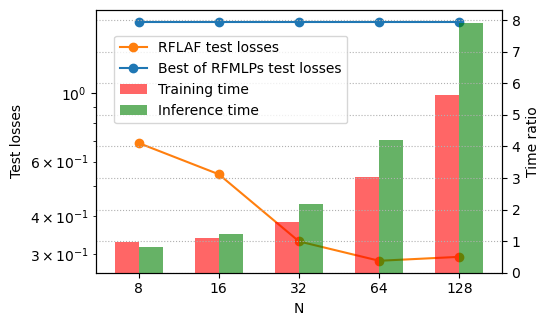

In [15]:
N_loss_list = curpdloss.loc['workloads',:].to_numpy()
N_train_list = curpdtrain.loc['workloads',:].to_numpy()
N_test_list = curpdtest.loc['workloads',:].to_numpy()

fig, ax1 = plt.subplots(figsize=(5.6, 3.36))

colors = ['#ff7f0e','#1f77b4']
ax2 = ax1.twinx()

width = 0.3  
indices = np.arange(5)

ax2.bar(indices - width/2, N_train_list, width, color='r', alpha=0.6, label='Training time')
ax2.bar(indices + width/2, N_test_list, width, color='g', alpha=0.6, label='Inference time')

ax2.set_ylabel('Time ratio')
ax2.set_xticks(indices)
ax2.set_xticklabels(np.array(N_list)-1)

ax1.semilogy(N_loss_list[2:], color=colors[0], marker='o', label='RFLAF test losses')
ax1.semilogy(np.ones(len(N_loss_list)-2)*N_loss_list[1], color=colors[1], marker='o', label='Best of RFMLPs test losses')
ax1.set_xlabel('N')
ax1.set_ylabel('Test losses')

# fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
fig.legend(loc='upper left', bbox_to_anchor=(0.2, 0.9))
ax2.grid(linestyle=':')

plt.tight_layout()
plt.savefig('Nfigure.pdf')
plt.show()


In [16]:
pd.set_option('display.float_format', '{:.3f}'.format)
curpdcv = info.iloc[3:,:].loc[:,[
    'cv_relu',
    'laf8_cv', 
    'laf16_cv',
    'laf32_cv', 
    'laf64_cv', 
    'laf128_cv',
    'num_epoch'
]].copy()

for i, name in enumerate(tmp_task_name_list[:3]):
    print(f'{write_task_name_list[i]}\t& {curpdcv.iloc[i,1]}\t& {curpdcv.iloc[i,2]}\t& \
        {curpdcv.iloc[i,3]}\t& {curpdcv.iloc[i,4]}\t& {curpdcv.iloc[i,5]}\t& {curpdcv.iloc[i,0]}\t& {curpdcv.iloc[i,6]}\t\\\\')

curpdcv

MNIST	& 10	& 9	&         6	& 4	& 3	& 9	& 10	\\
CIFAR-10	& 7	& 4	&         2	& 2	& 2	& 13	& 20	\\
adult	& 13	& 8	&         3	& 1	& 1	& 3	& 15	\\


,cv_relu,laf8_cv,laf16_cv,laf32_cv,laf64_cv,laf128_cv,num_epoch
mnist,9,10,9,6,4,3,10
cifar10,13,7,4,2,2,2,20
adult,3,13,8,3,1,1,15
protein,30,28,22,30,11,28,30
ct,15,24,30,19,28,19,30
workloads,30,30,24,28,21,24,30
msd,7,3,8,7,3,5,10


In [56]:
pd.set_option('display.float_format', '{:.3f}'.format)
curpdcv = info.iloc[3:,:].loc[:,[
    'cv_relu',
    # 'laf8_cv', 
    # 'bs8_cv',
    # 'pl8_cv',
    'laf16_cv',
    'bs16_cv',
    'pl16_cv',
    'laf32_cv', 
    'bs32_cv', 
    'pl32_cv', 
    'num_epoch'
]].copy()

# for i, name in enumerate(tmp_task_name_list[:3]):
#     print(f'{write_task_name_list[i]}\t& {curpdcv.iloc[i,1]}\t& {curpdcv.iloc[i,2]}\t& \
#         {curpdcv.iloc[i,3]}\t& {curpdcv.iloc[i,4]}\t& {curpdcv.iloc[i,5]}\t& {curpdcv.iloc[i,0]}\t& {curpdcv.iloc[i,6]}\t\\\\')

curpdcv

,cv_relu,laf16_cv,bs16_cv,pl16_cv,laf32_cv,bs32_cv,pl32_cv,num_epoch
mnist,9,9,7,9,6,2,10,10
cifar10,13,4,1,4,2,2,7,20
adult,3,8,3,10,3,3,1,15
protein,30,22,23,30,30,12,1,30
ct,15,30,29,30,19,27,1,30
workloads,30,24,26,26,28,23,29,30
msd,7,8,6,1,7,7,1,10


In [17]:
pd.set_option('display.float_format', '{:.1f}'.format)
curpdcvtime = info.iloc[3:,:].loc[:,[
    'cv_relu',
    'laf8_cvtime', 
    'laf16_cvtime',
    'laf32_cvtime', 
    'laf64_cvtime', 
    'laf128_cvtime',
]].copy()

for i, name in enumerate(tmp_task_name_list[:3]):
    print(f'{write_task_name_list[i]}\t& {curpdcvtime.iloc[i,1]:.1f}\t& {curpdcvtime.iloc[i,2]:.1f}\t& \
        {curpdcvtime.iloc[i,3]:.1f}\t& {curpdcvtime.iloc[i,4]:.1f}\t& {curpdcvtime.iloc[i,5]:.1f}\t& \
            {curpdcvtime.iloc[i,0]:.1f}\t\\\\')

curpdcvtime

MNIST	& 11.0	& 10.0	&         7.2	& 5.2	& 4.7	&             9.0	\\
CIFAR-10	& 7.5	& 4.4	&         2.4	& 2.8	& 3.6	&             13.0	\\
adult	& 20.4	& 14.2	&         7.6	& 4.6	& 8.0	&             3.0	\\


,cv_relu,laf8_cvtime,laf16_cvtime,laf32_cvtime,laf64_cvtime,laf128_cvtime
mnist,9,11.0,10.0,7.2,5.2,4.7
cifar10,13,7.5,4.4,2.4,2.8,3.6
adult,3,20.4,14.2,7.6,4.6,8.0
protein,30,47.9,43.1,85.5,57.6,276.8
ct,15,37.5,57.7,47.8,120.8,154.3
workloads,30,27.8,28.0,45.1,66.1,137.1
msd,7,2.6,8.3,10.4,8.3,24.9


In [57]:
pd.set_option('display.float_format', '{:.1f}'.format)
curpdcvtime = info.iloc[3:,:].loc[:,[
    'cv_relu',
    # 'laf8_cvtime', 
    # 'bs8_cvtime', 
    # 'pl8_cvtime', 
    'laf16_cvtime',
    'bs16_cvtime',
    'pl16_cvtime',
    'laf32_cvtime', 
    'bs32_cvtime', 
    'pl32_cvtime', 
]].copy()

for i, name in enumerate(tmp_task_name_list[:3]):
    print(f'{write_task_name_list[i]}\t& {curpdcvtime.iloc[i,1]:.1f}\t& {curpdcvtime.iloc[i,2]:.1f}\t& \
        {curpdcvtime.iloc[i,3]:.1f}\t& {curpdcvtime.iloc[i,4]:.1f}\t& {curpdcvtime.iloc[i,5]:.1f}\t& \
            {curpdcvtime.iloc[i,0]:.1f}\t\\\\')

curpdcvtime

MNIST	& 10.2	& 9.5	&         9.3	& 7.2	& 3.4	&             9.0	\\
CIFAR-10	& 4.4	& 1.3	&         4.1	& 2.3	& 3.3	&             13.0	\\
adult	& 14.1	& 11.6	&         10.2	& 7.4	& 22.0	&             3.0	\\


,cv_relu,laf16_cvtime,bs16_cvtime,pl16_cvtime,laf32_cvtime,bs32_cvtime,pl32_cvtime
mnist,9,10.2,9.5,9.3,7.2,3.4,10.6
cifar10,13,4.4,1.3,4.1,2.3,3.3,7.6
adult,3,14.1,11.6,10.2,7.4,22.0,1.6
protein,30,43.1,103.0,33.0,82.8,99.7,1.7
ct,15,53.8,112.3,33.0,46.4,187.1,1.6
workloads,30,26.7,67.4,16.8,44.8,108.5,29.5
msd,7,8.2,14.0,0.7,10.0,29.6,1.0


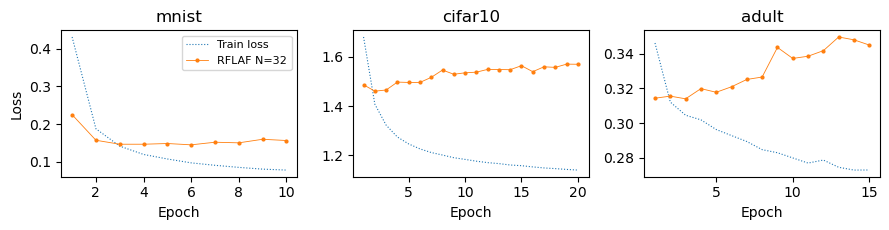

In [18]:
syn_task_name_list = ['mnist', 'cifar10', 'adult']
epoch_list = [10, 20, 15]
# title_name_list = [r'$f_1$', r'$f_2$', r'$f_3$']
colors = ['#ff7f0e','#1f77b4']
setN=32

fig, axs = plt.subplots(1,3, figsize=(9, 2.4))

for i, task in enumerate(syn_task_name_list):
    ax = axs[i]
    ax.plot(range(1,epoch_list[i]+1),train_loss_values[task+'_'+f'LAF{setN+1}'], label='Train loss', ls=':', linewidth=0.8, color=colors[1])
    ax.plot(range(1,epoch_list[i]+1),test_loss_values[task+'_'+f'LAF{setN+1}'], label=f'RFLAF N={setN}', linewidth=0.6, marker='o', markersize='2', color=colors[0])
    # ax.semilogy(range(1,epoch_list[i]+1),train_loss_values[task+'_'+f'LAF{setN+1}'], label='Train loss', ls=':', linewidth=0.8, color=colors[1])
    # ax.semilogy(range(1,epoch_list[i]+1),test_loss_values[task+'_'+f'LAF{setN+1}'], label=f'RFLAF N={setN}', linewidth=0.6, marker='o', markersize='2', color=colors[0])

    # ax.semilogy(range(1,46),test_loss_values[task+'_'+'relu'], label='RF_relu', linewidth=0.5, ls=':')
    # ax.semilogy(range(1,46),test_loss_values[task+'_'+'cos'], label='RF_cos', linewidth=0.5, ls=':')
    # ax.semilogy(range(1,46),test_loss_values[task+'_'+'tanh'], label='RF_tanh', linewidth=0.5, ls=':')
    # ax.semilogy(range(1,46),test_loss_values[task+'_'+'sigmoid'], label='RF_sigmoid', linewidth=0.5, ls=':')
    ax.set_title(syn_task_name_list[i])
    # ax.set_ylim(3*1e-5, 1)
    ax.set_xlabel('Epoch')
    # ax.grid(linestyle=':')
axs[0].set_ylabel('Loss')
# axs[0].legend(loc='upper left', fontsize=7)
axs[0].legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.savefig('classloss.pdf')

In [19]:
import matplotlib.pyplot as plt

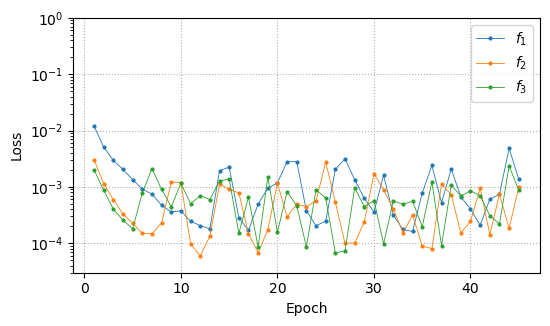

In [20]:
syn_task_name_list = ['sin', 'tru', 'zoi']
title_name_list = [r'$f_1$', r'$f_2$', r'$f_3$']
colors = ['#ff7f0e','#1f77b4']

plt.figure(figsize=(5.6, 3.36))

for i, task in enumerate(syn_task_name_list):
    # plt.semilogy(range(1,46),train_loss_values[task+'_'+'LAF'], label='Train loss', ls=':', linewidth=0.8, color=colors[1])
    plt.semilogy(range(1,46),test_loss_values[task+'_'+'LAF'], label=title_name_list[i], linewidth=0.6, marker='o', markersize='2')

plt.ylim(3*1e-5, 1)
plt.xlabel('Epoch')
plt.grid(linestyle=':')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('synloss.pdf')

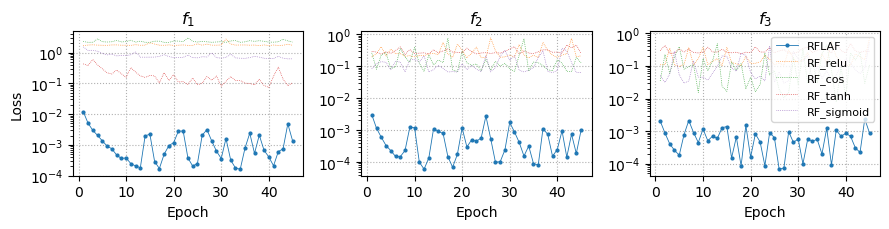

In [21]:
syn_task_name_list = ['sin', 'tru', 'zoi']
title_name_list = [r'$f_1$', r'$f_2$', r'$f_3$']
colors = ['#ff7f0e','#1f77b4']

fig, axs = plt.subplots(1,3, figsize=(9, 2.4))

for i, task in enumerate(syn_task_name_list):
    ax = axs[i]
    # plt.semilogy(range(1,46),train_loss_values[task+'_'+'LAF'], label='Train loss', ls=':', linewidth=0.8, color=colors[1])
    ax.semilogy(range(1,46),test_loss_values[task+'_'+'LAF'], label='RFLAF', linewidth=0.6, marker='o', markersize='2')

    ax.semilogy(range(1,46),test_loss_values[task+'_'+'relu'], label='RF_relu', linewidth=0.5, ls=':')
    ax.semilogy(range(1,46),test_loss_values[task+'_'+'cos'], label='RF_cos', linewidth=0.5, ls=':')
    ax.semilogy(range(1,46),test_loss_values[task+'_'+'tanh'], label='RF_tanh', linewidth=0.5, ls=':')
    ax.semilogy(range(1,46),test_loss_values[task+'_'+'sigmoid'], label='RF_sigmoid', linewidth=0.5, ls=':')
    ax.set_title(title_name_list[i])
    # ax.set_ylim(3*1e-5, 1)
    ax.set_xlabel('Epoch')
    ax.grid(linestyle=':')
axs[0].set_ylabel('Loss')
# axs[0].legend(loc='upper left', fontsize=7)
axs[2].legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.savefig('synloss0.pdf')

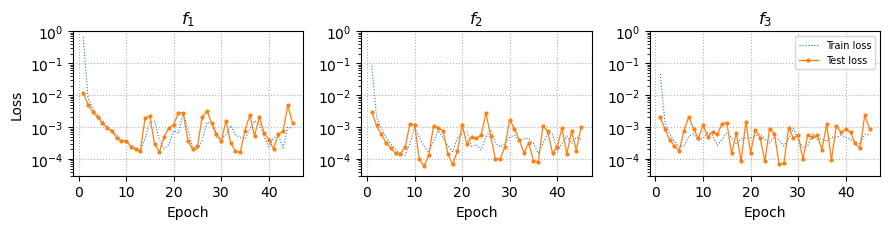

In [22]:
syn_task_name_list = ['sin', 'tru', 'zoi']
title_name_list = [r'$f_1$', r'$f_2$', r'$f_3$']
colors = ['#ff7f0e','#1f77b4']
fig, axs = plt.subplots(1, 3, figsize=(9, 2.4), sharey=False)

for i, task in enumerate(syn_task_name_list):
    ax = axs[i]
    ax.semilogy(range(1,46),train_loss_values[task+'_'+'LAF'], label='Train loss', ls=':', linewidth=0.8, color=colors[1])
    ax.semilogy(range(1,46),test_loss_values[task+'_'+'LAF'], label='Test loss', linewidth=0.9, marker='o', markersize='2', color=colors[0])
    ax.set_title(title_name_list[i])
    ax.set_ylim(3*1e-5, 1)
    ax.set_xlabel('Epoch')
    ax.grid(linestyle=':')
axs[0].set_ylabel('Loss')
# axs[0].legend(loc='upper left', fontsize=7)
axs[2].legend(loc='upper right', fontsize=7)


# for i, task in enumerate(syn_task_name_list):
#     axs[i].semilogy(range(1,46),train_loss_values[task+'_'+'LAF'], label='Train loss', ls=':', linewidth=0.8, color=colors[1])
#     axs[i].semilogy(range(1,46),test_loss_values[task+'_'+'LAF'], label='Test loss', linewidth=0.9, marker='o', markersize='2', color=colors[0])
#     axs[i].set_title(title_name_list[i])
#     axs[i].set_xlabel('Epoch')
#     axs[i].set_ylabel('Loss')
#     axs[i].grid(linestyle=':')


plt.tight_layout()
plt.savefig('synloss1.pdf')

Using device: cuda


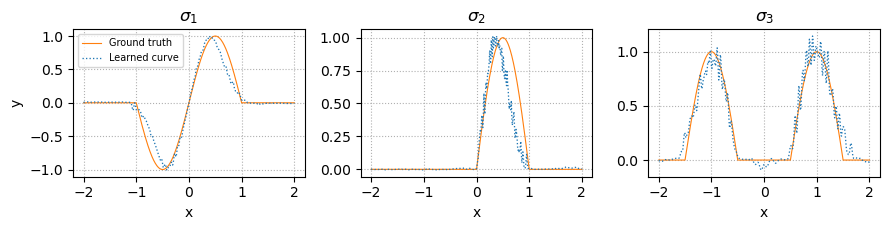

In [23]:
import torch
import torch.nn as nn
from RFLAF_model import RBFLayer
from gen_data import Mysin, Myfunc2, Myfunc3

class testrbf(nn.Module):
    def __init__(self, x, h, N, L, R):
        super(testrbf, self).__init__()
        hlist=h * np.ones(N)
        clist=np.linspace(L, R, N)
        paralist = list(zip(clist, hlist))
        
        self.rbfs = nn.ModuleList([RBFLayer(torch.tensor(center), torch.tensor(gamma)) for center, gamma in paralist])
        self.A = torch.stack([rbf(x) for rbf in self.rbfs], dim=1) # [len(x), N]

    def forward(self, a):
        Aa = torch.matmul(self.A, a) # [len(x)]
        return Aa

fig, axs = plt.subplots(1, 3, figsize=(9, 2.4), sharey=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

data_list = ['sin', 'tru', 'zoi']
h_list = [0.02, 0.01, 0.02]
epoch_list = [25, 12, 45]
modelseed_list = [402025, 402025, 102025]
amplitude = [3.65, 5.5, -7.8]
title_list = [r'$\sigma_1$', r'$\sigma_2$', r'$\sigma_3$']

for i in range(3):
    lambda1, lambda2 = 1, 0.1
    h, N, L, R, M = h_list[i], 401, -2, 2, 1000
    x_list = torch.tensor(np.linspace(L, R, 401), requires_grad=False).to(device)
    learned_func = testrbf(x_list, h, N, L, R).to(device)

    data = data_list[i]
    actfunc = 'LAF'
    moreargs=f'_h={h}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}'
    moreargs=f'seed={modelseed_list[i]}_epoch={epoch_list[i]}{moreargs}'
    task_name = data_list[i] + '_' + actfunc

    if data=='sin':
        mysinfunc = Mysin.apply
    elif data=='tru':
        mysinfunc = Myfunc2.apply
    elif data=='zoi':
        mysinfunc = Myfunc3.apply
    if data in ['sin', 'tru', 'zoi']:
        # mysinfunc = mysinfunc.to(device)
        y_list2 = mysinfunc(x_list).cpu().numpy() # Ground truth function

    coef = torch.tensor(np.loadtxt(f"./coef/{task_name}_coef_{moreargs}_{epoch_list[i]}.txt")).to(device)
    y_list = learned_func(coef).cpu().numpy()

    ax = axs[i]

    # Plot the learned activation function
    if data in ['sin', 'tru', 'zoi']:
        ax.plot(x_list.cpu().detach().numpy(), y_list2, label='Ground truth', ls='-', linewidth=0.8, color=colors[0])
    ax.plot(x_list.cpu().detach().numpy(), y_list*(amplitude[i]), label='Learned curve', ls=':', linewidth=0.95, color=colors[1])
    ax.set_xlabel('x')
    ax.set_title(title_list[i])
    ax.grid(ls=':')

axs[0].set_ylabel('y')
axs[0].legend(loc='upper left', fontsize=7)
plt.tight_layout()
plt.savefig('synactf2.pdf')
# os.makedirs('./transform_figs', exist_ok=True)
# plt.savefig(f"./transform_figs/{task_name}_actfunc_{moreargs}.pdf", format='pdf')

Using device: cuda


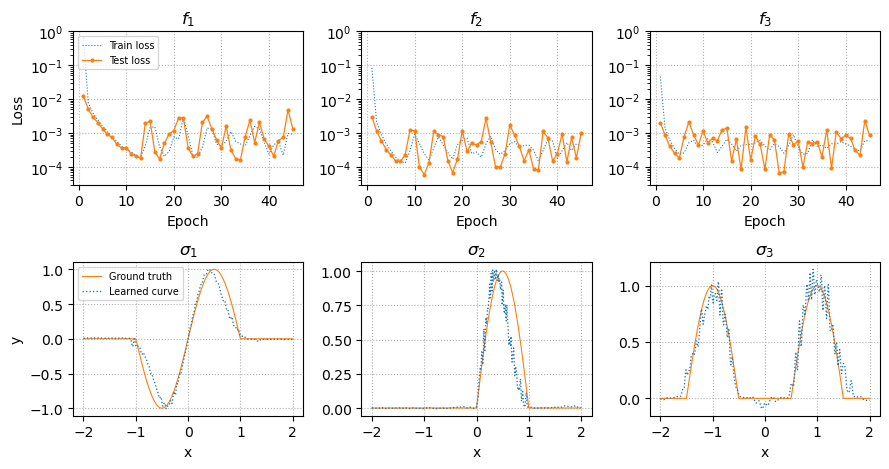

In [24]:
import torch
import torch.nn as nn
from RFLAF_model import RBFLayer
from gen_data import Mysin, Myfunc2, Myfunc3

class testrbf(nn.Module):
    def __init__(self, x, h, N, L, R):
        super(testrbf, self).__init__()
        hlist=h * np.ones(N)
        clist=np.linspace(L, R, N)
        paralist = list(zip(clist, hlist))
        
        self.rbfs = nn.ModuleList([RBFLayer(torch.tensor(center), torch.tensor(gamma)) for center, gamma in paralist])
        self.A = torch.stack([rbf(x) for rbf in self.rbfs], dim=1) # [len(x), N]

    def forward(self, a):
        Aa = torch.matmul(self.A, a) # [len(x)]
        return Aa

#

syn_task_name_list = ['sin', 'tru', 'zoi']
title_name_list = [r'$f_1$', r'$f_2$', r'$f_3$']
colors = ['#ff7f0e','#1f77b4']
fig, axs = plt.subplots(2, 3, figsize=(9, 4.8), sharey=False)

for i, task in enumerate(syn_task_name_list):
    ax = axs[0, i]
    ax.semilogy(range(1,46),train_loss_values[task+'_'+'LAF'], label='Train loss', ls=':', linewidth=0.8, color=colors[1])
    ax.semilogy(range(1,46),test_loss_values[task+'_'+'LAF'], label='Test loss', linewidth=0.9, marker='o', markersize='2', color=colors[0])
    ax.set_title(title_name_list[i])
    ax.set_ylim(3*1e-5, 1)
    ax.set_xlabel('Epoch')
    ax.grid(linestyle=':')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(loc='upper left', fontsize=7)

#

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

data_list = ['sin', 'tru', 'zoi']
h_list = [0.02, 0.01, 0.02]
epoch_list = [25, 12, 45]
modelseed_list = [402025, 402025, 102025]
amplitude = [3.65, 5.5, -7.8]
title_list = [r'$\sigma_1$', r'$\sigma_2$', r'$\sigma_3$']

for i in range(3):
    lambda1, lambda2 = 1, 0.1
    h, N, L, R, M = h_list[i], 401, -2, 2, 1000
    x_list = torch.tensor(np.linspace(L, R, 401), requires_grad=False).to(device)
    learned_func = testrbf(x_list, h, N, L, R).to(device)

    data = data_list[i]
    actfunc = 'LAF'
    moreargs=f'_h={h}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}'
    moreargs=f'seed={modelseed_list[i]}_epoch={epoch_list[i]}{moreargs}'
    task_name = data_list[i] + '_' + actfunc

    if data=='sin':
        mysinfunc = Mysin.apply
    elif data=='tru':
        mysinfunc = Myfunc2.apply
    elif data=='zoi':
        mysinfunc = Myfunc3.apply
    if data in ['sin', 'tru', 'zoi']:
        # mysinfunc = mysinfunc.to(device)
        y_list2 = mysinfunc(x_list).cpu().numpy() # Ground truth function

    coef = torch.tensor(np.loadtxt(f"./coef/{task_name}_coef_{moreargs}_{epoch_list[i]}.txt")).to(device)
    y_list = learned_func(coef).cpu().numpy()

    ax = axs[1, i]

    # Plot the learned activation function
    if data in ['sin', 'tru', 'zoi']:
        ax.plot(x_list.cpu().detach().numpy(), y_list2, label='Ground truth', ls='-', linewidth=0.8, color=colors[0])
    ax.plot(x_list.cpu().detach().numpy(), y_list*(amplitude[i]), label='Learned curve', ls=':', linewidth=0.95, color=colors[1])
    ax.set_xlabel('x')
    ax.set_title(title_list[i])
    ax.grid(ls=':')

axs[1, 0].set_ylabel('y')
axs[1, 0].legend(loc='upper left', fontsize=7)
plt.tight_layout()
plt.savefig('synactf.pdf')
# os.makedirs('./transform_figs', exist_ok=True)
# plt.savefig(f"./transform_figs/{task_name}_actfunc_{moreargs}.pdf", format='pdf')

Using device: cuda
tensor([-0.0039, -0.0037, -0.0037, -0.0037, -0.0038, -0.0039, -0.0037, -0.0036,
        -0.0037, -0.0040], device='cuda:0', dtype=torch.float64)
tensor([-0.0022, -0.0020, -0.0020, -0.0019, -0.0018, -0.0016, -0.0014, -0.0014,
        -0.0012, -0.0011], device='cuda:0', dtype=torch.float64)
tensor([0.0030, 0.0033, 0.0035, 0.0033, 0.0034, 0.0028, 0.0027, 0.0031, 0.0031,
        0.0032], device='cuda:0', dtype=torch.float64)


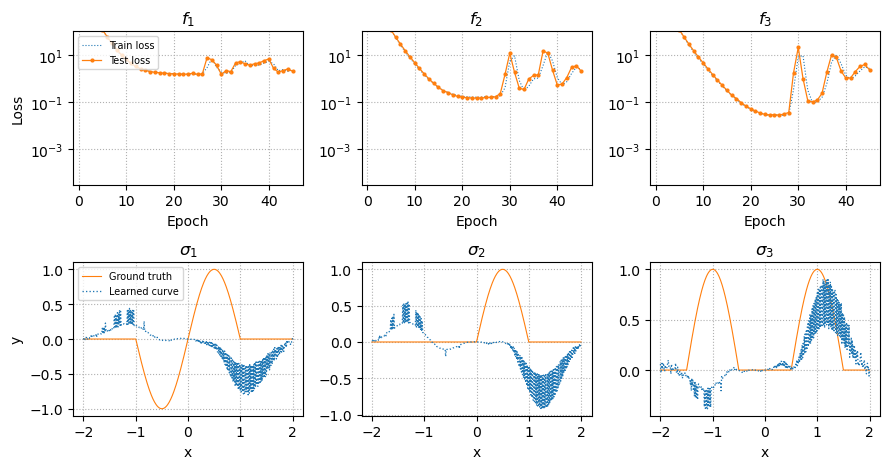

In [ ]:
# Plot BS

import torch
import torch.nn as nn
from RFLAF_model import RBFLayer
from gen_data import Mysin, Myfunc2, Myfunc3
import torch.autograd as autograd

class HardIndicatorFunction(autograd.Function):
    @staticmethod
    def forward(ctx, x, a, b):
        return ((x >= a) & (x < b)).type_as(x)
    
    @staticmethod
    def backward(ctx, grad_output):
        grad_x = torch.zeros_like(grad_output)
        return grad_x, None, None

class IndicatorFunction(nn.Module):
    def __init__(self, a, b):
        super(IndicatorFunction, self).__init__()
        self.a = a
        self.b = b
        
    def forward(self, x):
        return HardIndicatorFunction.apply(x, self.a, self.b)
        
class BSplineLayer(nn.Module):
    def __init__(self, c, h):
        super(BSplineLayer, self).__init__()
        self.c = c
        self.h = h
        self.c1, self.c2, self.c3, self.c4 = c-h, c, c+h, c+2*h
        self.I1 = IndicatorFunction(c-h, c)
        self.I2 = IndicatorFunction(c, c+h)
        self.I3 = IndicatorFunction(c+h, c+2*h)
        
    def forward(self, x):
        result = (x - self.c1)**2 * self.I1(x) \
            + (1.5 * self.h**2 - 2 * (x - ((self.c2+self.c3)/2.0) * self.h)**2) * self.I2(x) \
            + (x - self.c4)**2 * self.I3(x)
        return 2 * result / (3*self.h**2)

class testbs(nn.Module):
    def __init__(self, x, N, L, R):
        super(testbs, self).__init__()
        hlist=(R-L)/(1.0*(N-1)) * np.ones(N)
        clist=np.linspace(L, R, N)
        paralist = list(zip(clist, hlist))
        
        self.rbfs = nn.ModuleList([BSplineLayer(torch.tensor(center), torch.tensor(gamma)) for center, gamma in paralist])
        self.A = torch.stack([rbf(x) for rbf in self.rbfs], dim=1) # [len(x), N]

    def forward(self, a):
        Aa = torch.matmul(self.A, a) # [len(x)]
        return Aa

#

syn_task_name_list = ['sin', 'tru', 'zoi']
title_name_list = [r'$f_1$', r'$f_2$', r'$f_3$']
colors = ['#ff7f0e','#1f77b4']
fig, axs = plt.subplots(2, 3, figsize=(9, 4.8), sharey=False)

for i, task in enumerate(syn_task_name_list):
    ax = axs[0, i]
    ax.semilogy(range(1,46),train_loss_values[task+'_'+'BS'], label='Train loss', ls=':', linewidth=0.8, color=colors[1])
    ax.semilogy(range(1,46),test_loss_values[task+'_'+'BS'], label='Test loss', linewidth=0.9, marker='o', markersize='2', color=colors[0])
    ax.set_title(title_name_list[i])
    ax.set_ylim(3*1e-5, 100)
    ax.set_xlabel('Epoch')
    ax.grid(linestyle=':')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(loc='upper left', fontsize=7)

#

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

data_list = ['sin', 'tru', 'zoi']
h_list = [0.02, 0.01, 0.02]
epoch_list = [45, 45, 45]
epoch_list2 = [45, 45, 45]
modelseed_list = [402025, 402025, 102025]
amplitude = [4/1000, 8/2000, 4/1000]
title_list = [r'$\sigma_1$', r'$\sigma_2$', r'$\sigma_3$']

for i in range(3):
    lambda1, lambda2 = 1, 0.1
    h, N, L, R, M = h_list[i], 401, -2, 2, 1000
    x_list = torch.tensor(np.linspace(L, R, 401), requires_grad=False).to(device)
    learned_func = testbs(x_list, N, L, R).to(device)

    data = data_list[i]
    actfunc = 'BS'
    moreargs=f'_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}'
    moreargs=f'seed={modelseed_list[i]}_epoch={epoch_list[i]}{moreargs}'
    task_name = data_list[i] + '_' + actfunc

    if data=='sin':
        mysinfunc = Mysin.apply
    elif data=='tru':
        mysinfunc = Myfunc2.apply
    elif data=='zoi':
        mysinfunc = Myfunc3.apply
    if data in ['sin', 'tru', 'zoi']:
        # mysinfunc = mysinfunc.to(device)
        y_list2 = mysinfunc(x_list).cpu().numpy() # Ground truth function

    coef = torch.tensor(np.loadtxt(f"./coef/{task_name}_coef_{moreargs}_{epoch_list2[i]}.txt")).to(device)
    print(coef[100:110])
    y_list = learned_func(coef).cpu().numpy()

    ax = axs[1, i]

    # Plot the learned activation function
    if data in ['sin', 'tru', 'zoi']:
        ax.plot(x_list.cpu().detach().numpy(), y_list2, label='Ground truth', ls='-', linewidth=0.8, color=colors[0])
    ax.plot(x_list.cpu().detach().numpy(), y_list*(amplitude[i]), label='Learned curve', ls=':', linewidth=0.95, color=colors[1])
    ax.set_xlabel('x')
    ax.set_title(title_list[i])
    ax.grid(ls=':')

axs[1, 0].set_ylabel('y')
axs[1, 0].legend(loc='upper left', fontsize=7)
plt.tight_layout()
# plt.savefig('synactf.pdf')
# os.makedirs('./transform_figs', exist_ok=True)
# plt.savefig(f"./transform_figs/{task_name}_actfunc_{moreargs}.pdf", format='pdf')